<h1><center>
    ECE 438 - Laboratory 10b<br/>
    Image Processing (Week 2)<br/>
    <small>Last updated on April 24, 2022</small><br/>
    <br/>
    Date: 4/27/23 <br/>
    Section: Thursday 11:30am<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Connor Davin|CJD | 0|

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of color images and color spaces (40 pts)**: *Python figures with color components, code (`ycbcr2rgb`), filtered images, questions*||||
|**Understanding of halftoning (60 pts)**: *Original and binary images with MSE, error images, table of MSE’s for filered and nonfiltered images, questions*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 10)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.3: Color</left></h3>

**1. Load the image file ```girl.tif```. Check the size of array for this image by using the command ```print(image.shape)```, where ```image``` is the image matrix. Also, print the data type of this matrix.** 

Notice that this is a three dimensional array of type ```uint8```. It contains three gray scale image planes corresponding to the red, green, and blue components for each pixel. Since each color pixel is represented by three bytes, this is commonly known as a 24-bit image.

In [3]:
# insert your code here
girl = plt.imread("girl.tif")

print(girl.shape)

(256, 384, 3)


**2. Display the image. Note that ```cmap```, ```vmin```, ```vmax``` arguments are not needed.**

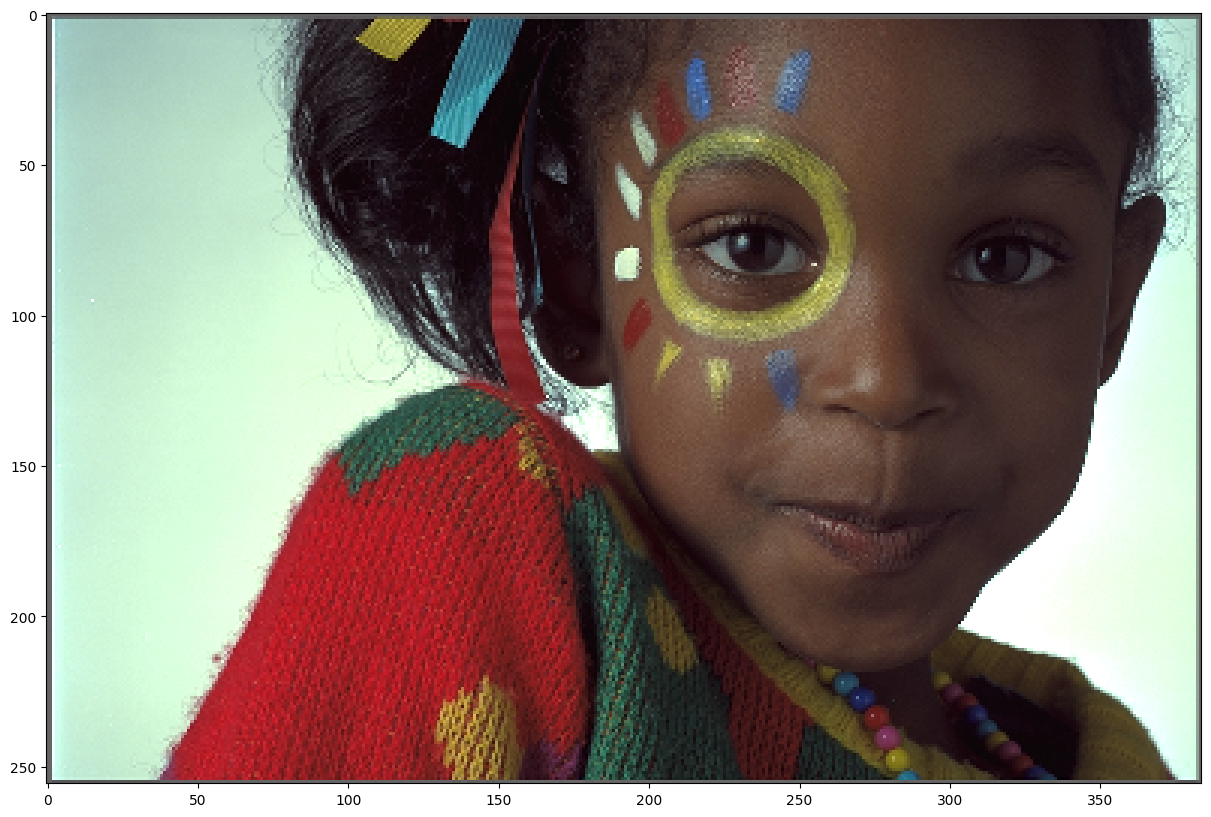

In [32]:
# insert your code here
plt.imshow(girl)

**3. Extract each of the color components, then plot each color component.**

Note that while the original is a color image, each color component separately is a monochrome image, so plotting each color component requires ```cmap```, ```vmin```, ```vmax``` arguments.

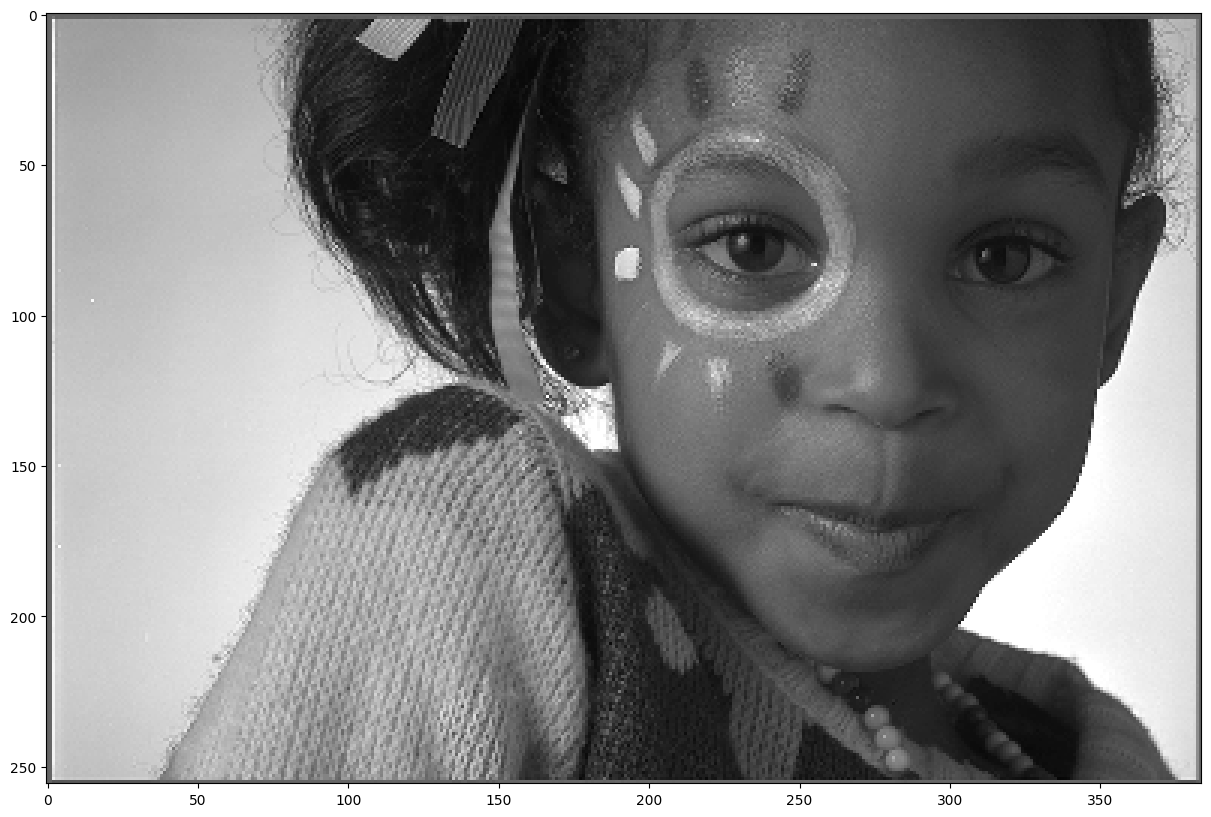

In [23]:
# insert your code here
plt.imshow(girl[::, ::, 0], cmap = "gray", vmin = 0, vmax = 255)

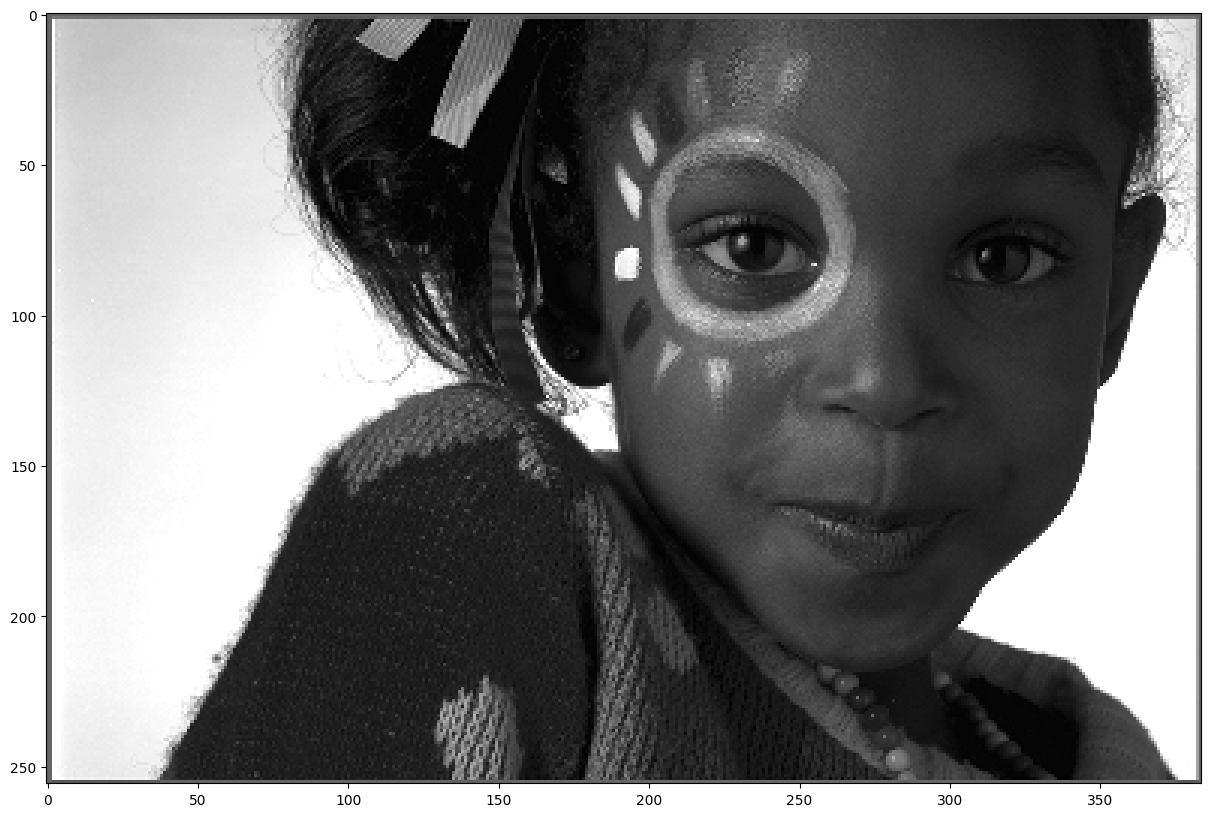

In [24]:
plt.imshow(girl[::, ::, 1], cmap = "gray", vmin = 0, vmax = 255)

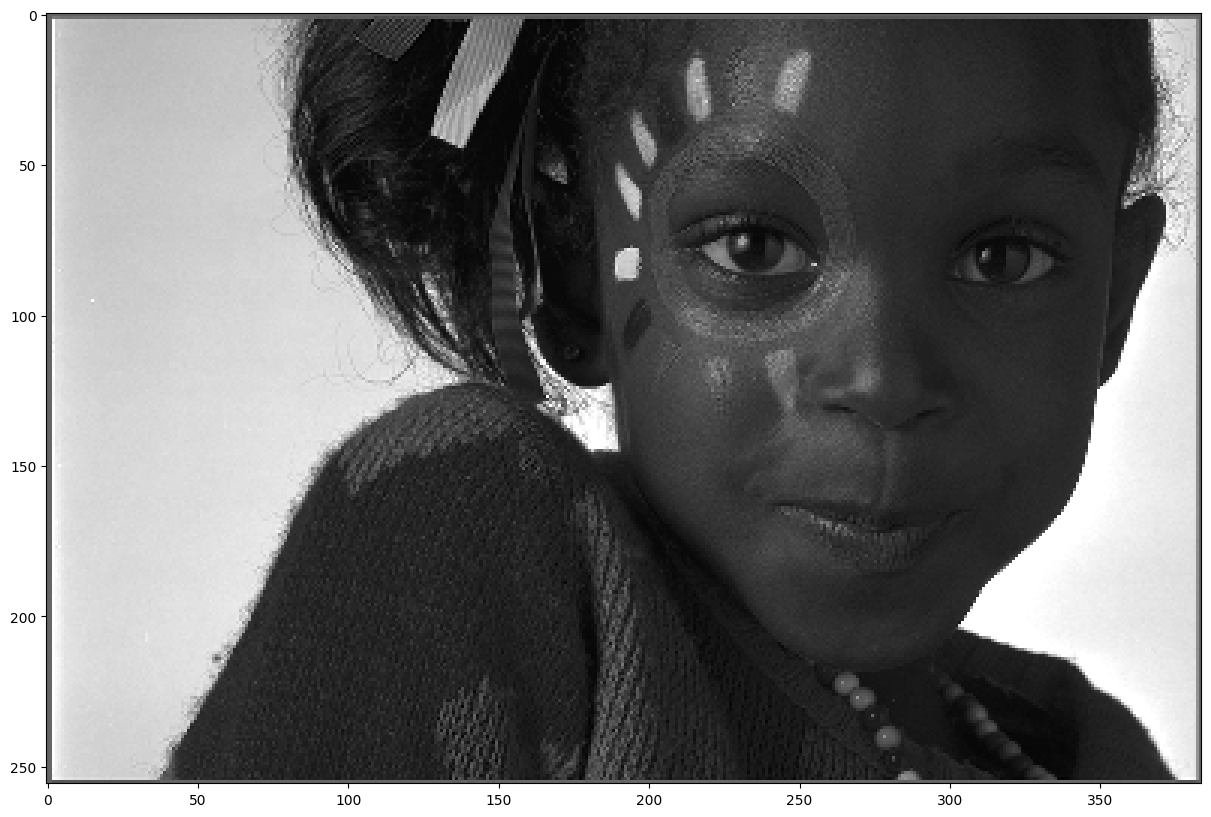

In [25]:
plt.imshow(girl[::, ::, 2], cmap = "gray", vmin = 0, vmax = 255)

**4. Load the files ```ycbcr.npy``` using [`np.load()`](https://numpy.org/doc/stable/reference/generated/numpy.load.html), and print its type and data shape `dtype`.**

This file contains a NumPy array for a color image in $YC_bC_r$ format. The array contains three gray scale image planes that correspond to the luminance ($Y$) and two chrominance ($C_bC_r$) components.

In [10]:
# insert your code here
ycbcr = np.load('ycbcr.npy')
print(ycbcr.dtype)

uint8


**5. Plot each of the components.**

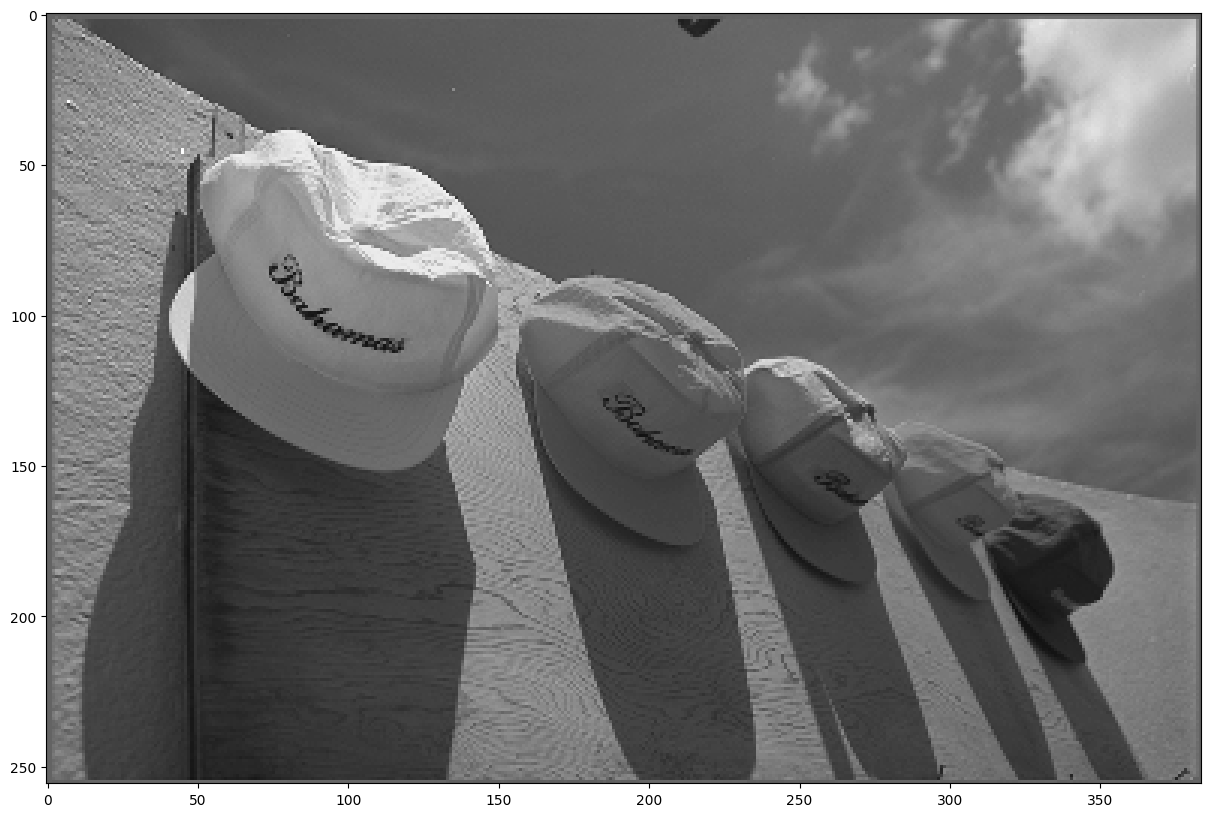

In [26]:
# insert your code here
plt.imshow(ycbcr[::, ::, 0], cmap = "gray", vmin = 0, vmax = 255)

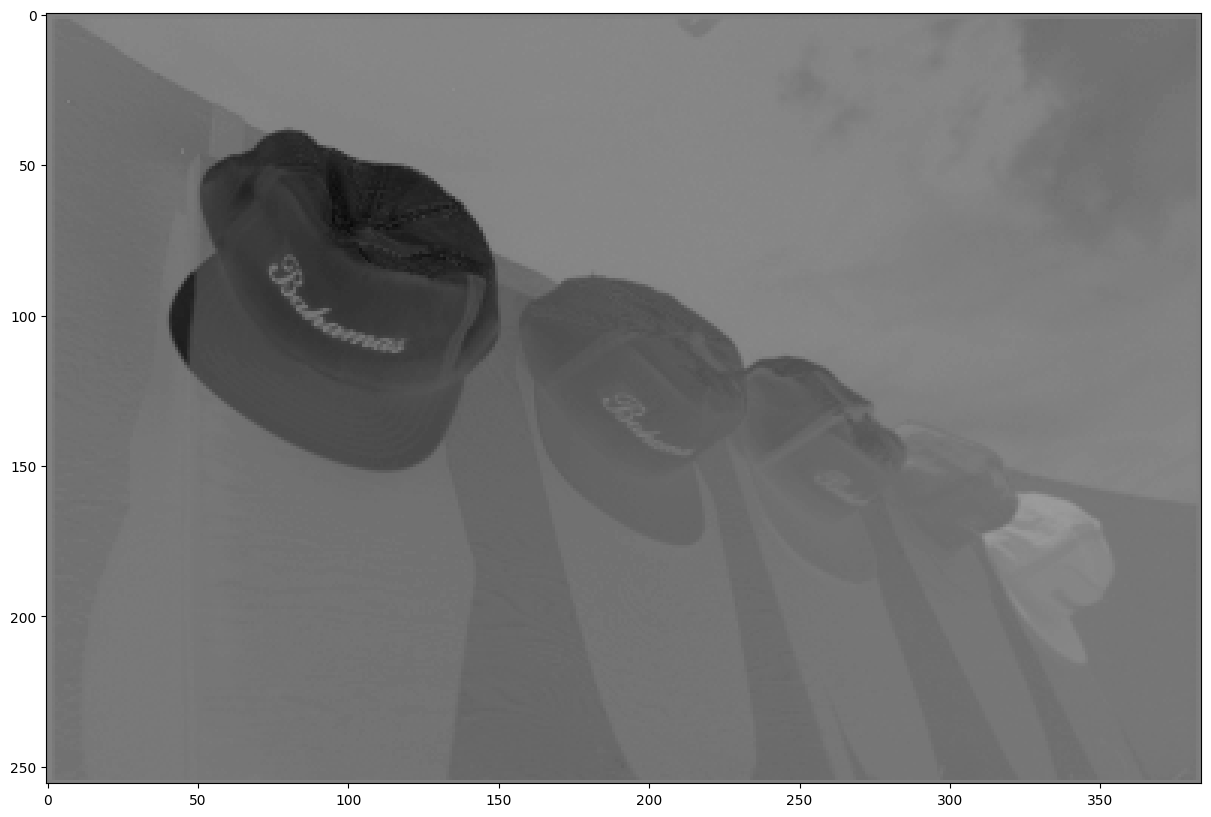

In [28]:
plt.imshow(ycbcr[::, ::, 1], cmap = "gray", vmin = 0, vmax = 255)

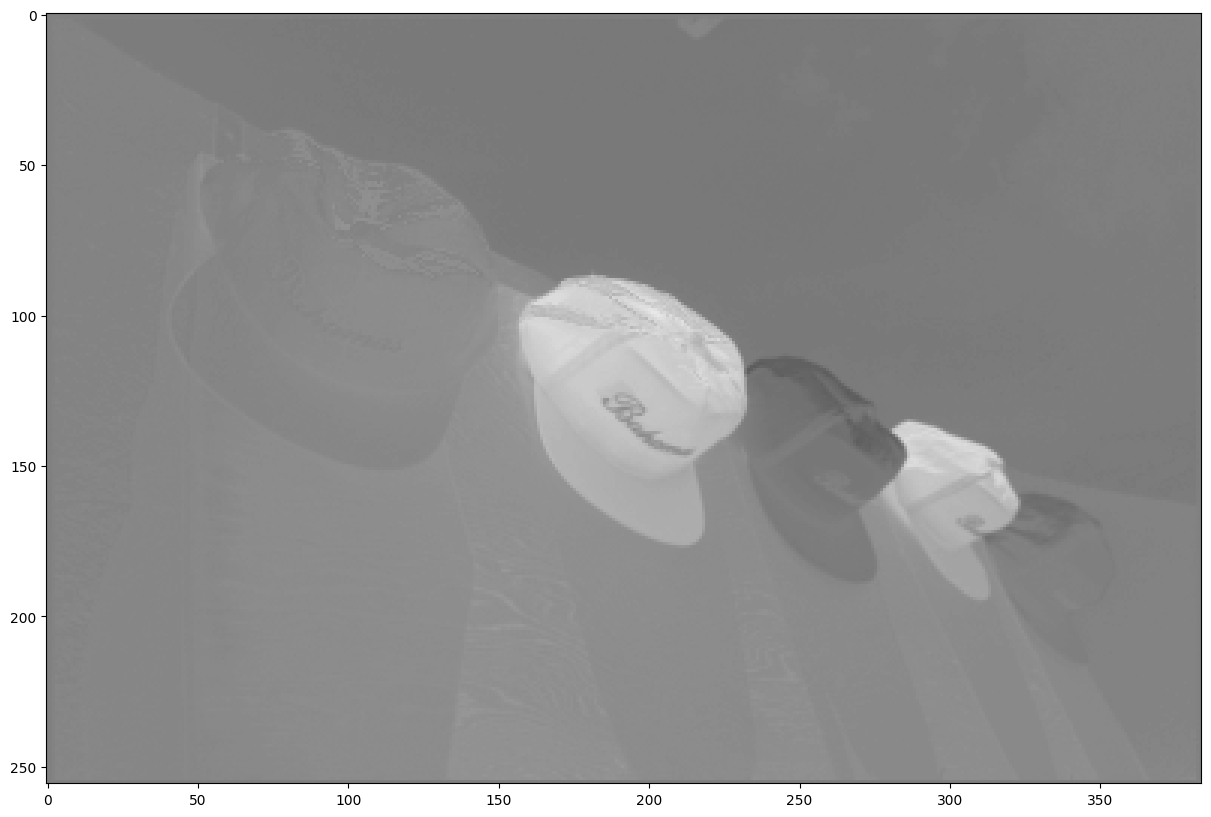

In [29]:
plt.imshow(ycbcr[::, ::, 2], cmap = "gray", vmin = 0, vmax = 255)

**6. Complete the function below that will perform the transformation of equation (2). It should accept a 3-D $YC_bC_r$ image array as input, and return a 3-D $RGB$ image array.**

* Make sure `ycbcr` is in `double` or `float` before any processing.
* After conversion, to make sure the values of `rgb` are in $[0,255]$, use [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).

In [14]:
def ycbcr2rgb(ycbcr):
    """
    Parameters
    ---
    ycbcr: image in YCbCr
    
    Returns
    ---
    rgb: image RGB
    """
    y = ycbcr[::, ::, 0]
    cb = ycbcr[::, ::, 1]
    cr = ycbcr[::, ::, 2]
    rgb = [ [y+1.4025*(cr-128)], [y-0.3443*(cb-128)-0.7144*(cr-128)], [y + 1.7730*(cb-128)] ]
    return rgb

**7. Now, convert the ycbcr array to an RGB representation and display the color image.**

* Before displaying the image, make sure its data type is `np.uint8`.

In [ ]:
# insert your code here


**8. Load the file ```h.npy```. This is a $5 \times 5$ Gaussian filter with $\sigma^2=2.0$. (See the first week of the experiment for more details on this type of filter.)**

In [30]:
# insert your code here
h = np.load('h.npy')

**9. Alter the ```ycbcr``` array by filtering only the luminance component, ```ycbcr[:,:,0]```, using the Gaussian filter (use `convolve2d()` function from last lab). Convert the result to RGB, and display it.**

* Instead of altering the original `ycbcr`, you can create a copy by `ycbcr1 = ycbcr.copy()`.

In [ ]:
def convolve2d(image, kernel):
    """
    Parameters
    ---
    image: the input image
    kernel: the filter
    
    Returns
    ---
    filtered: the filtered image
    """
    filtered = None
    return filtered

In [ ]:
# insert your code here


**10. Now alter `ycbcr` by filtering both chrominance components, ```ycbcr[:,:,1]``` and ```ycbcr[:,:,2]```, using the Gaussian filter. Convert this result to RGB, and display it.**

* Again, instead of altering the original `ycbcr`, you can create a copy by `ycbcr2 = ycbcr.copy()`.

In [ ]:
# insert your code here


<h3 style="color:red;"><left>Exercise 3.2: Halftoning - Simple Thresholding</left></h3>

**1. Load the grayscale image file ```house.tif``` and display it.**

In [ ]:
# insert your code here


**2. Try the simple thresholding technique based on equation (3), using $T = 108$, and display the result.**

* In Python, an easy way to threshold an image $X$ is to use the command ```Y = 255 * (X > T)```.

In [ ]:
# insert your code here


**3. Create an “absolute error” image by subtracting the binary from the original image, and then taking the absolute value. The degree to which the original image is present in the error image is a measure of signal dependence of the quantization error. Display the error image.**

In [ ]:
# insert your code here


**4. Compute the mean square error (MSE), which is defined by**

$$\text{MSE}=\frac{1}{MN}\sum_{i,j}\left\{f[i,j]-b[i,j]\right\}^2\tag{9}$$

**where $MN$ is the total number of pixels in each image, $f$ is the original image and $b$ is the binarized image.**

In [ ]:
# insert your code here


<h3 style="color:red;"><left>Exercise 3.4: Halftoning - Ordered Dithering</left></h3>

**1. Based on this index matrix and equation (6), create the corresponding threshold matrix and print it.**

In [ ]:
# insert your code here


**2. Apply the ordered dithering and display the halftoned image.**

In [ ]:
# insert your code here


**3. Compute the error image and display it.**

In [ ]:
# insert your code here


**4. Compute the MSE of the error image.**

In [ ]:
# insert your code here


<h3 style="color:red;"><left>Exercise 3.6: Halftoning - Error Diffusion</left></h3>

**1. Use the algorithm to create the halftoned image and display it.**

In [ ]:
# insert your code here


**2. Compute the error image and display it.**

In [ ]:
# insert your code here


**3. Compute the MSE of the error image.**

In [ ]:
# insert your code here


**4. By comparing three MSE values, is the MSE consistent with the visual quality?**

insert your answer here

**5. By looking at the error images, determine which method appears to be the least signal dependent? Does the signal dependence seem to be correlated with the visual quality?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.7: Halftoning - Filtered Halftone</left></h3>

**1. The human visual system naturally lowpass filters halftone images. To analyze this phenomenon, filter each of the halftone images with the Gaussian lowpass filter `h` that you loaded from `h.npy`, and measure the MSE of the filtered versions.**

In [ ]:
# insert your code here


**2. Use the following template to make a table.**

| Halftone Method     |   Filtered    | Not filtered | 
|:-------------------:|:-------------:|:------------:|   
| Simple Thresholding |               |              |   
| Ordered Dithering   |               |              |  
| Error Diffusion     |               |              |

**3. Compare the MSE’s of the filtered versions with the nonfiltered versions for each method. What is the implication of these observations with respect to how we perceive halftone images.**

insert your answer here